In [75]:
# Original File name: linearfit_errors.ipynb
# suggested  Mods by Garith Smith April 2023
# Fitting a line to data with errors
# Analytically find the best fitting parameters of a linear fit to the data through the method of ordinary least squares estimation. (i.e. find m and b for y = m*x + b)
# Based on:
# https://github.com/anazalea/phys2300stuff/tree/master/climateData
# https://github.com/anazalea/phys2300stuff/blob/master/climateData/climateChange.ipynb

# Iterative Fitting

**Purpose:** This notebook will read a .csv file (comma-separated variables), and plot the data.
It will then use  ***iterative fitting*** to find the best fit of a specified function to the data.
It will provide a $\chi^2$ value  and a residuals plot to help diagnose the goodness-of-fit.

**How to use:** Duplicate this notebook, or copy and paste the relevant code cells into a new notebook. Remove the "explanation" markdown cells, and replace them with your own markdown cells for your lab report. Make sure you understand what the python code is doing at each step.

## Setup and Data Entry:

First, import numpy (standard scientific/numerical python library) and matplotlib (standard plotting python library).

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%matplotlib inline

Now lets import our data from a .csv file (comma-separated variables). Some tips:
- Change the name of the *datafile* so it points to the .csv file with your data.
- Make sure that the .csv file is in the same folder as this notebook, or that you specify the absolute path.
- If you have a header line in your .csv file, make sure it has a # in front of it.

In [77]:
#Identifying and reading the data
datafile = "Fe55.csv"
data = np.genfromtxt(datafile, delimiter=",", dtype=float)

Lets create a vector of values (a.k.a. a 1-dimensional numpy array) for each column of the .csv file. These vectors let us do calculations on every data point at once, similar to applying an excel formula to every value in a column.

In [78]:
#Making Vectors from the data
x_var = data[:, 0]  # Make a vector of all elements (:) in the first column (0)
y_var = data[:, 1]  # Make a vector of all elements in the second column
y_uncertainty = data[:, 2]  # Make a vector of all elements in the third column

## Plotting:

In this case, we will simply use the columns of the .csv file, but in the future you can do some pre-processing calculations at this stage.

Let's add the axis labels, plot title, and the lower and upper limits for the plot axes.

In [79]:
#Preparing the Plots
x_label = "Year"
y_label = "Average Global Surface Temperature in January [$^\circ$C]"
title = "Average Global Surface Temperature in January"
xmin = 0
xmax = 10
ymin = 0
ymax = 1

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
/var/folders/dq/g_x8zlvn6tj19xyfvct_qqd80000gn/T/ipykernel_39587/1947730912.py:3: SyntaxWarning: invalid escape sequence '\c'
  y_label = "Average Global Surface Temperature in January [$^\circ$C]"


Now lets make a graph of y_var vs. x_var, with error bars on the y data.

In [80]:
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# To manually change the axis limits, uncomment (remove the # at the start) these lines:
#plt.ylim(ymin, ymax)  # This sets the range of the y-axis
#plt.xlim(xmin, xmax)  # This sets the range of the x-axis

# To save the plot as a .png, uncomment this:
#plt.savefig("plot", bbox_inches="tight", dpi=300)  # Saves the figure

Text(0.5, 1.0, 'Average Global Surface Temperature in January')

## Iterative Fitting:

This section fits the data with a specified model.
You can choose any function to be your model; the currently set function is a linear function.
The iterative fitting algorithm repeatedly guesses the fit parameters, using the method of gradient descent to improve on the previous guess until it converges to a satisfactory fit. 

This block defines the mathematical function which will be used to fit the data. Here it is set to a linear function where the parameter $a$ is the slope and $b$ is the y-intercept. The values of the parameters are not set; the fitter will find the values for these parameters which best fit the data.

In [81]:
def FitFunction(x, a, b,c):
    y = a*np.exp(-b*x)+c
    return y

n_parameters = 3

Before we use this function to fit our data, we need to set up the fitting routine. We can optionally provide the following pieces of information to help out the fitter:

- A list of lower and upper bounds for the parameters
- A list of initial guesses for the parameters.

Currently the parameter lower bounds and upper bounds (param_bounds) are set to -/+ infinity (np.inf), and the guesses (initial_param) are both set to 1. (You can set each bound and parameter manually; for example for three parameters: initial_guesses = (100, 5, 3).)

In [82]:
#Parameter Bounds ([lower bounds,...],[Upper bounds,...])
param_bounds=([-np.inf,-np.inf],[np.inf,np.inf])  
initial_param=(1,1,1)  

Now we tell python to try to fit our function to the data, and also calculate errors on each parameter.

In [83]:
optimized_parameters, covariance_matrix = curve_fit(FitFunction, x_var,y_var,
                                                    sigma=y_uncertainty,absolute_sigma=True,
                                                    bounds=param_bounds,p0=initial_param)
parameter_errors = np.sqrt(np.diag(covariance_matrix))

Finally we print out the best fit parameters and their errors.

In [84]:
for i in range(len(optimized_parameters)):
    print(f'Parameter #{i+1}: {optimized_parameters[i]:.6e} ± {parameter_errors[i]:.1e}')

Parameter #1: 9.677033e-01 ± 4.3e-02
Parameter #2: 3.370487e-01 ± 2.7e-02
Parameter #3: -2.610120e-02 ± 1.6e-02


## Plotting the fit results:

To display the best fit function, we start by defining a range of x values for which to plot the function. We then create an array of 200 points within this x range. For each point, we use the best fit parameters from the previous section to calculate the y value of the function at that point.

In [85]:
# First calculate a reasonable range of x values for our line
x_length = max(x_var) - min(x_var)
x_min_l = min(x_var) - 0.05*x_length
x_max_l = max(x_var) + 0.05*x_length
# Create our array of 200 linearly-spaced points
xForLine = np.linspace(x_min_l,x_max_l,200)
# Calculate the y values of the best fit line
yForLine = FitFunction(xForLine,*optimized_parameters)

Now we are ready to plot the fit function with our data. We repeat the code to plot the previous graph, and then plot our fit function.

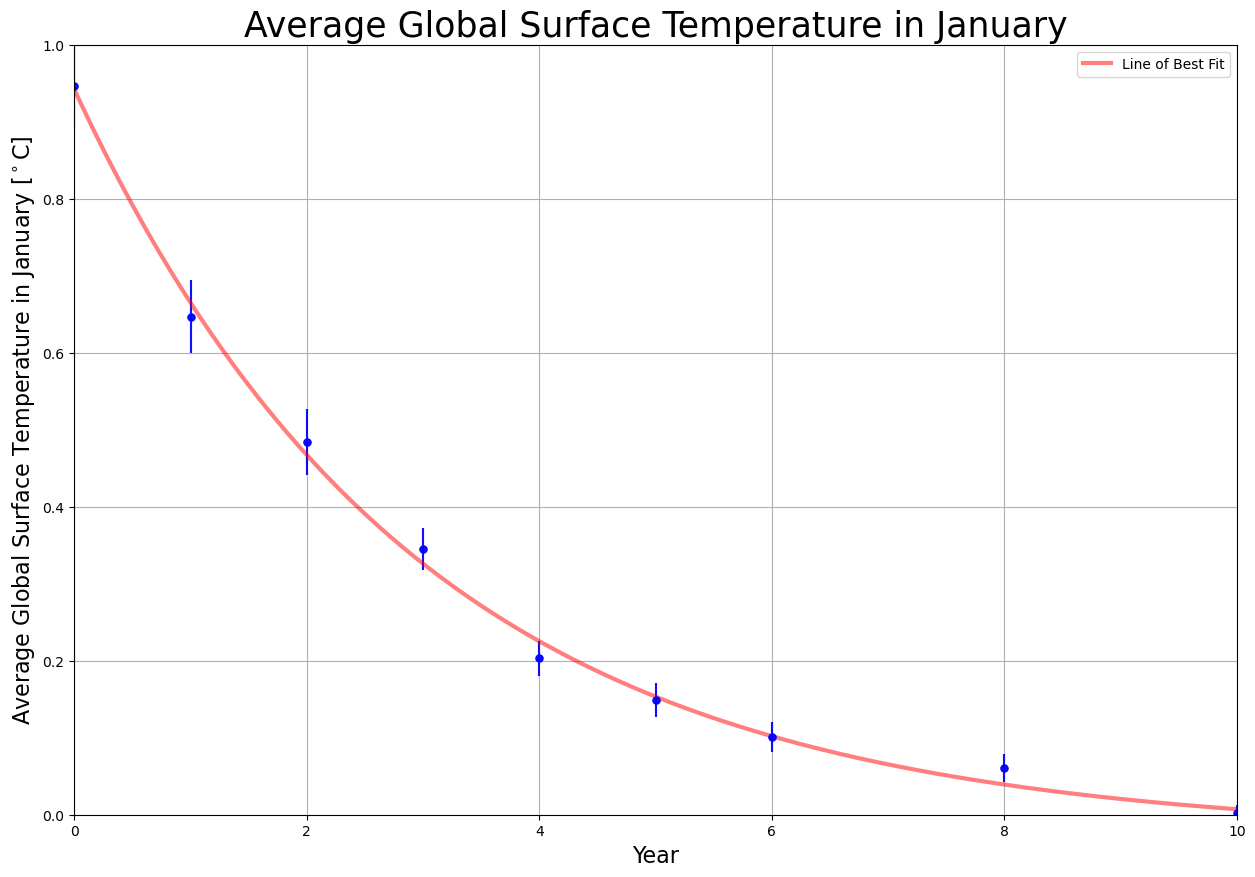

In [86]:
# Plot our data
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# To manually change the axis limits, uncomment (remove the # at the start) these lines:
plt.ylim(ymin, ymax)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis

# Add the line to the plot
plt.plot(xForLine, yForLine, lw=3, color="red", alpha=0.5, label="Line of Best Fit")

# Add a legend
plt.legend()
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_fit", bbox_inches="tight", dpi=300)  # Saves the figure

## Diagnosing the goodness-of-fit:

Now lets calculate the residual for each data point, i.e. the difference between the data and the fit function.

In [87]:
residual = y_var - FitFunction(x_var,*optimized_parameters)

Lets plot the residuals graph. Recall that the residuals should be evenly distributed around zero, and there should be no visible trend or pattern in the residuals. Approximately 68% of the error bars should cross zero, and 95% of data points should be within two error bars of zero.

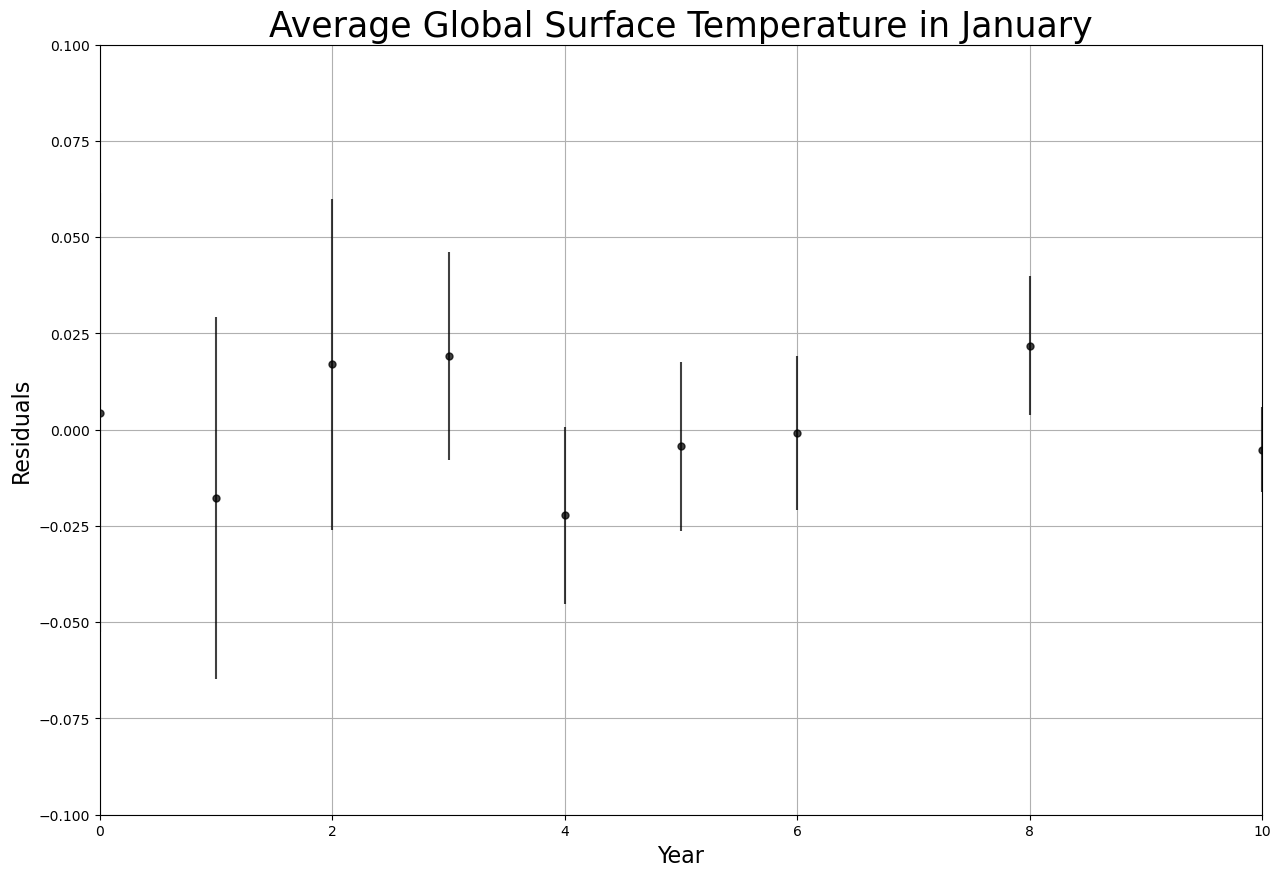

In [88]:
# Plot the residuals
plt.errorbar(x_var, residual, yerr=y_uncertainty, fmt="o", ms=5, color="black", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel("Residuals", fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# Set the axis limits for the residuals plot
ymin_r=-0.1
ymax_r=0.1
plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
plt.xlim(xmin, xmax)  # This sets the range of the x-axis
plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_residuals", bbox_inches="tight", dpi=300)  # Saves the figure

Lets also calculate the $\chi^2$ value for our fit. This indicates the goodness-of-fit:
- $\chi^2>>1$ indicates the model is not a good fit to the data, or uncertainties are likely underestimated.
- $\chi^2\sim1$ indicates the model is a good fit to the data.
- $\chi^2<<1$ indicates the model is "too good" a fit, i.e. the uncertainties are likely overestimated.

In [89]:
ndof = len(x_var) - len(optimized_parameters) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
ru = residual / y_uncertainty
chisq = np.sum(np.power(ru, 2)) / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

Chisq 0.6933
